In [96]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline

In [25]:
# Read in average monthly temperature by state data
revised_region_sales_temp_data = 'Resources/adidas_default.csv'
revised_region_sales_temp_df = pd.read_csv(revised_region_sales_temp_data,
                               index_col='Month')

print(revised_region_sales_temp_df.dtypes)


Unnamed: 0        int64
State            object
Year              int64
Region           object
Gender           object
Product          object
Units Sold        int64
Total Sales       int64
Average Temp    float64
dtype: object


In [64]:
file_path = "Resources/adidas_default.csv"
revised_region_sales_temp_data = pd.read_csv(file_path)

def process_temperature_and_sales(revised_region_sales_temp_df):
    # Ensure the input is a DataFrame
    if not isinstance(revised_region_sales_temp_df, pd.DataFrame):
        raise TypeError("Input must be a Pandas DataFrame.")
    

    required_columns = ['Average Temp', 'Total Sales', 'Region', 'Product', 'Month']
    for col in required_columns:
        if col not in revised_region_sales_temp_df.columns:
            raise ValueError(f"Missing required column: {col}")

In [65]:

revised_region_sales_temp_df['Average Temp'] = revised_region_sales_temp_df['Average Temp'].astype(int) 
print(revised_region_sales_temp_df.dtypes)


Unnamed: 0       int64
State           object
Year             int64
Region          object
Gender          object
Product         object
Units Sold       int64
Total Sales      int64
Average Temp     int64
dtype: object


In [66]:
print(type(revised_region_sales_temp_data))
print(revised_region_sales_temp_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Unnamed: 0', 'State', 'Year', 'Region', 'Gender', 'Product',
       'Units Sold', 'Total Sales', 'Average Temp'],
      dtype='object')


In [67]:
if isinstance(revised_region_sales_temp_data, dict):
    revised_region_sales_temp_data = pd.DataFrame(revised_region_sales_temp_data)

In [68]:
print("Type of input:", type(revised_region_sales_temp_data))
print("Input content:", revised_region_sales_temp_data)


Type of input: <class 'pandas.core.frame.DataFrame'>
Input content:       Unnamed: 0    State  Year  Month Region   Gender            Product  \
0              0  Alabama  2021      8  South    Men's            Apparel   
1              1  Alabama  2021      8  South    Men's  Athletic Footwear   
2              2  Alabama  2021      8  South    Men's    Street Footwear   
3              3  Alabama  2021      8  South  Women's            Apparel   
4              4  Alabama  2021      8  South  Women's  Athletic Footwear   
...          ...      ...   ...    ...    ...      ...                ...   
2701        3025  Wyoming  2021     12   West    Men's  Athletic Footwear   
2702        3026  Wyoming  2021     12   West    Men's    Street Footwear   
2703        3027  Wyoming  2021     12   West  Women's            Apparel   
2704        3028  Wyoming  2021     12   West  Women's  Athletic Footwear   
2705        3029  Wyoming  2021     12   West  Women's    Street Footwear   

      U

In [76]:

revised_region_sales_temp_data = pd.DataFrame(revised_region_sales_temp_data)

def process_temperature_and_sales(revised_region_sales_temp_df):

    if not isinstance(revised_region_sales_temp_df, pd.DataFrame):
        raise TypeError("Input must be a Pandas DataFrame.")


    required_columns = ['Average Temp', 'Total Sales', 'Region', 'Product', 'Month']
    for col in required_columns:
        if col not in revised_region_sales_temp_df.columns:
            raise ValueError(f"Missing required column: {col}")


    buckets = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]
    labels = [
        "0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40",
        "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75",
        "75-80", "80-85", "85 and Above"
    ]

    revised_region_sales_temp_df['Temp Bucket'] = pd.cut(
        revised_region_sales_temp_df['Average Temp'], bins=buckets, labels=labels, right=False
    )

    aggregated_sales = revised_region_sales_temp_df.groupby(
        ['Temp Bucket', 'Region', 'Product', 'Month']
    )['Total Sales'].sum().reset_index()

    return revised_region_sales_temp_df, aggregated_sales

revised_region_sales_temp_df, processed_data = process_temperature_and_sales(revised_region_sales_temp_data)

print("Columns after processing:", revised_region_sales_temp_df.columns)
print("Processed data columns:", processed_data.columns)





Columns after processing: Index(['Unnamed: 0', 'State', 'Year', 'Month', 'Region', 'Gender', 'Product',
       'Units Sold', 'Total Sales', 'Average Temp', 'Temp Bucket'],
      dtype='object')
Processed data columns: Index(['Temp Bucket', 'Region', 'Product', 'Month', 'Total Sales'], dtype='object')


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/2075256165.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_sales = revised_region_sales_temp_df.groupby(


In [77]:
print(revised_region_sales_temp_df.columns)

Index(['Unnamed: 0', 'State', 'Year', 'Month', 'Region', 'Gender', 'Product',
       'Units Sold', 'Total Sales', 'Average Temp', 'Temp Bucket'],
      dtype='object')


In [79]:
aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region'])['Total Sales'].sum().reset_index()


In [80]:
pivoted_data = aggregated_data.pivot(index='Month', columns='Region', values='Total Sales')


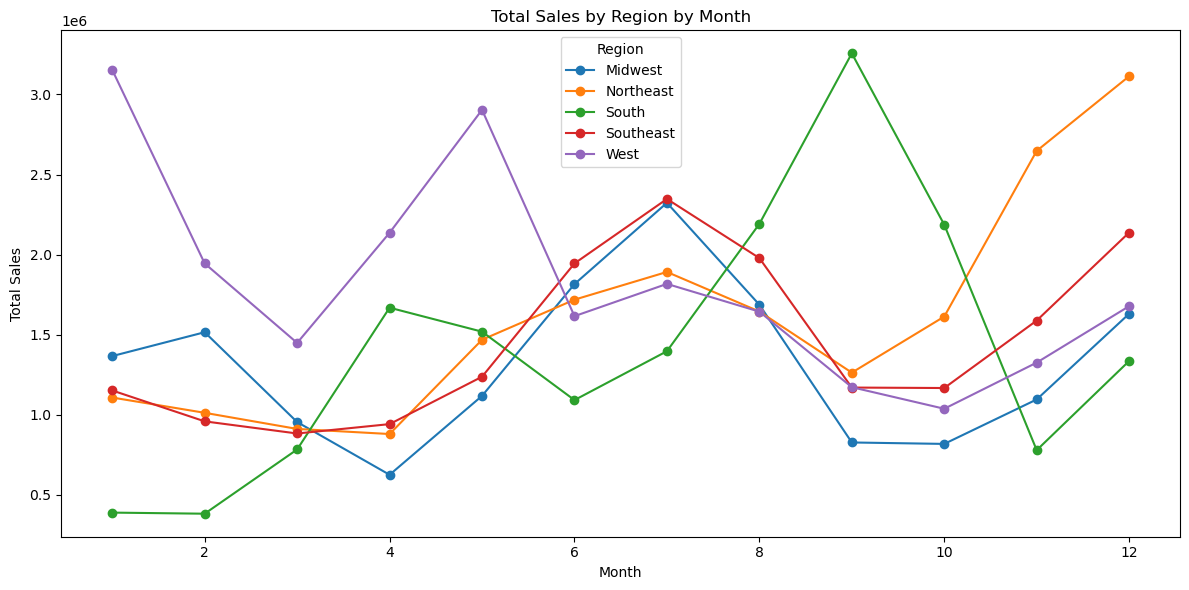

In [84]:
pivoted_data.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Total Sales by Region by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.tight_layout()

plt.show()


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1818529399.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = revised_region_sales_temp_df.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


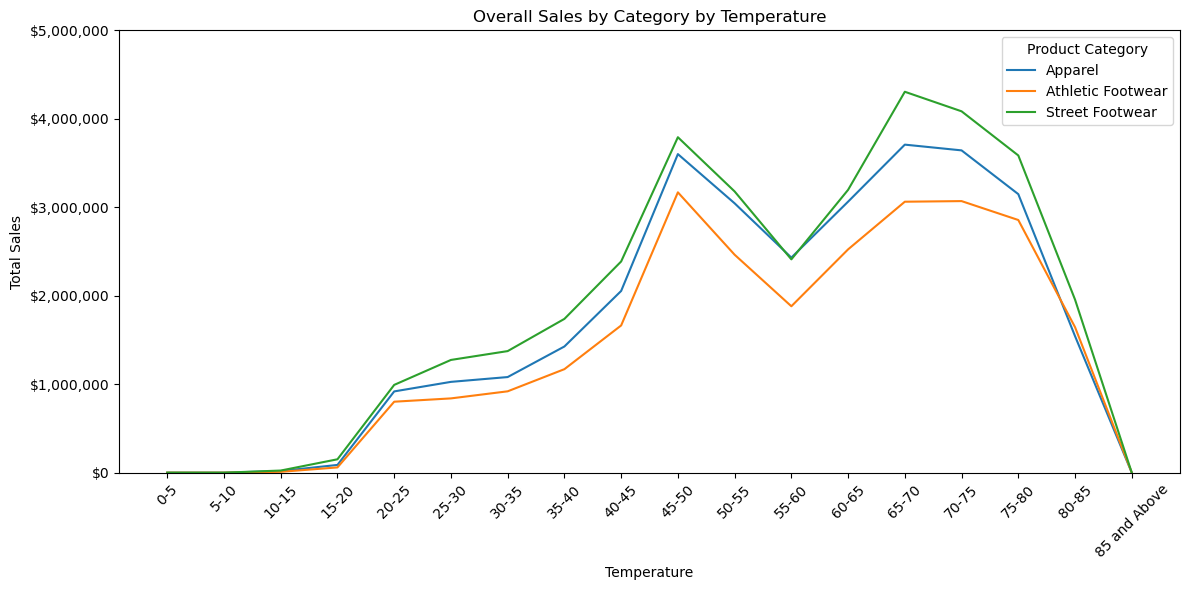

In [101]:
aggregated_data = revised_region_sales_temp_df.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()

pivoted_data = aggregated_data.pivot(index='Temp Bucket', columns='Product', values='Total Sales')
pivoted_data.plot(kind='line', figsize=(12, 6))



plt.title('Overall Sales by Category by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')

plt.xticks(ticks=range(len(pivoted_data.index)), labels=pivoted_data.index, rotation=45)
plt.ylim(0, 5_000_000) 

ax = plt.gca()  # Get the current axes
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


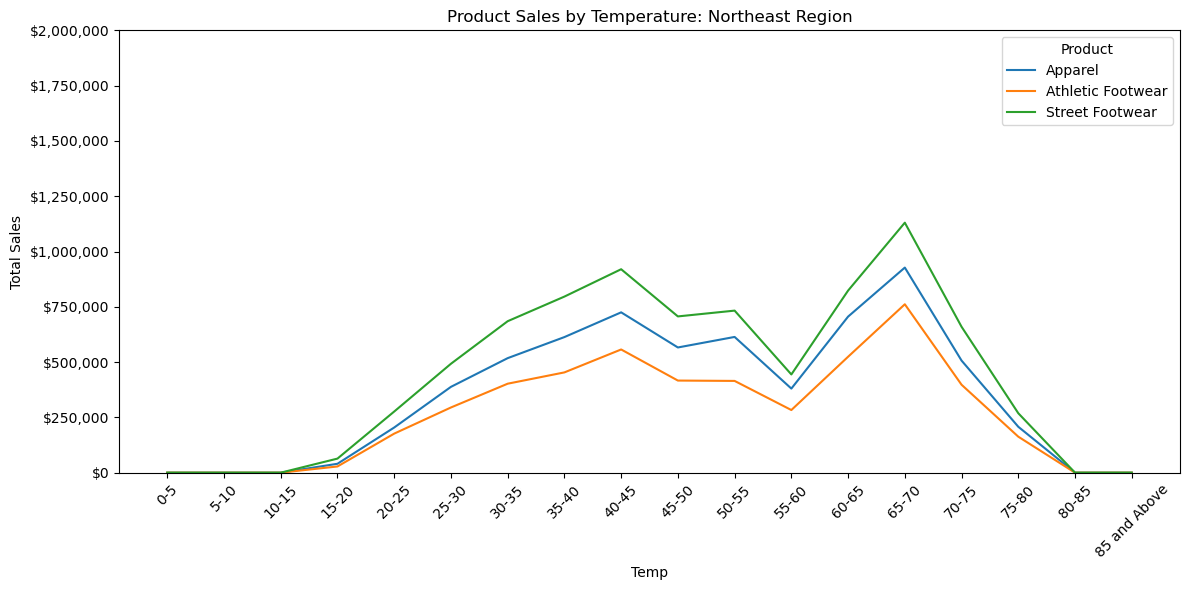

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


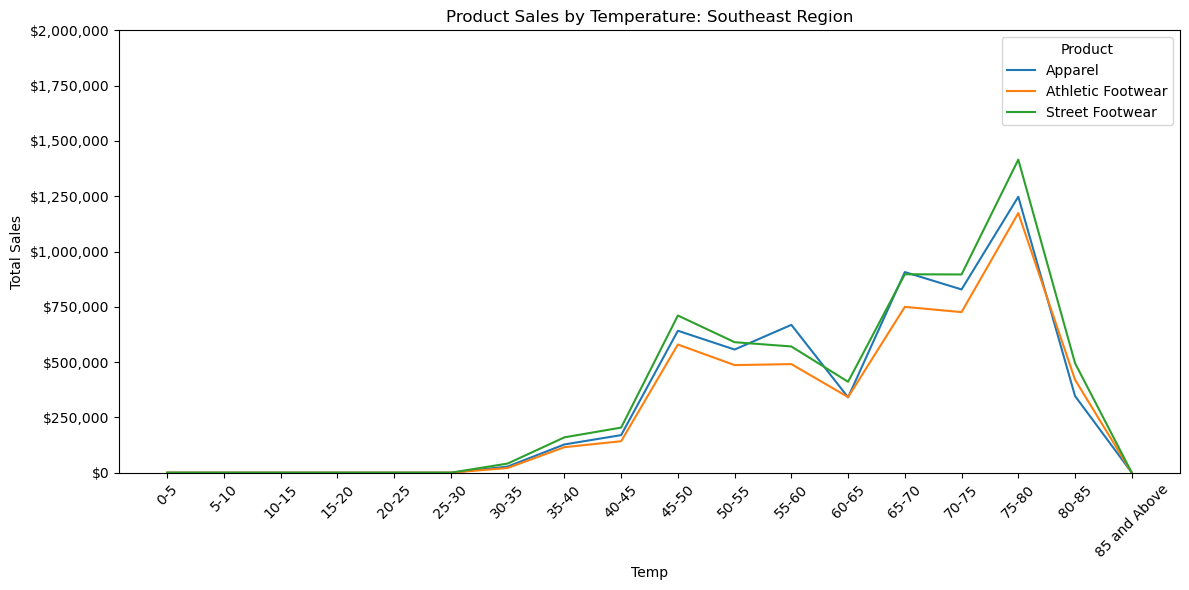

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


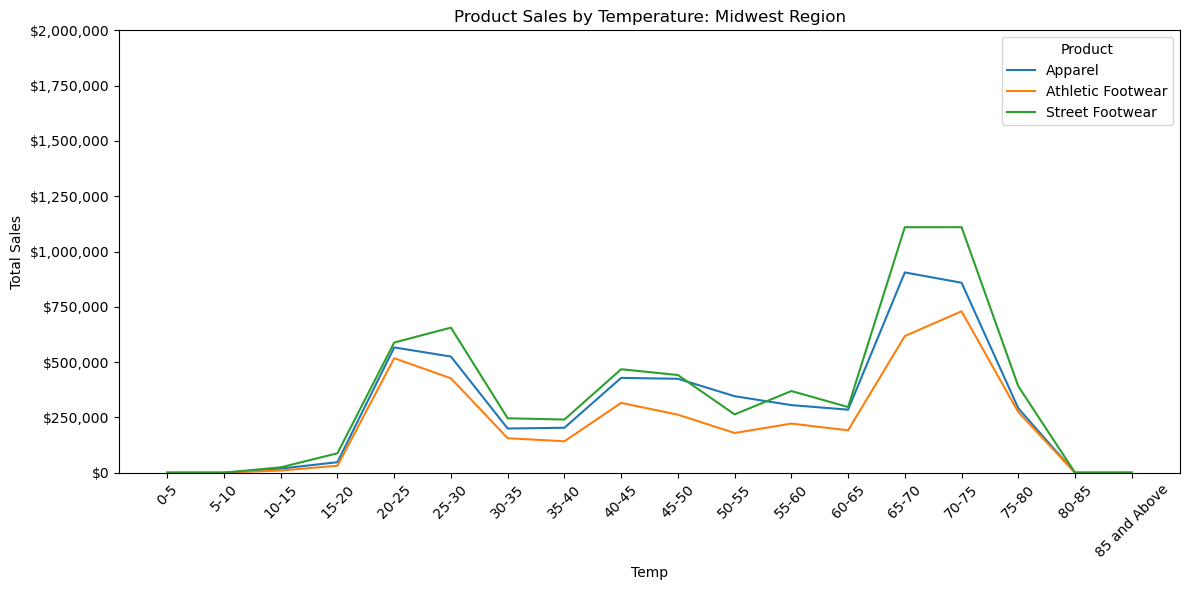

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


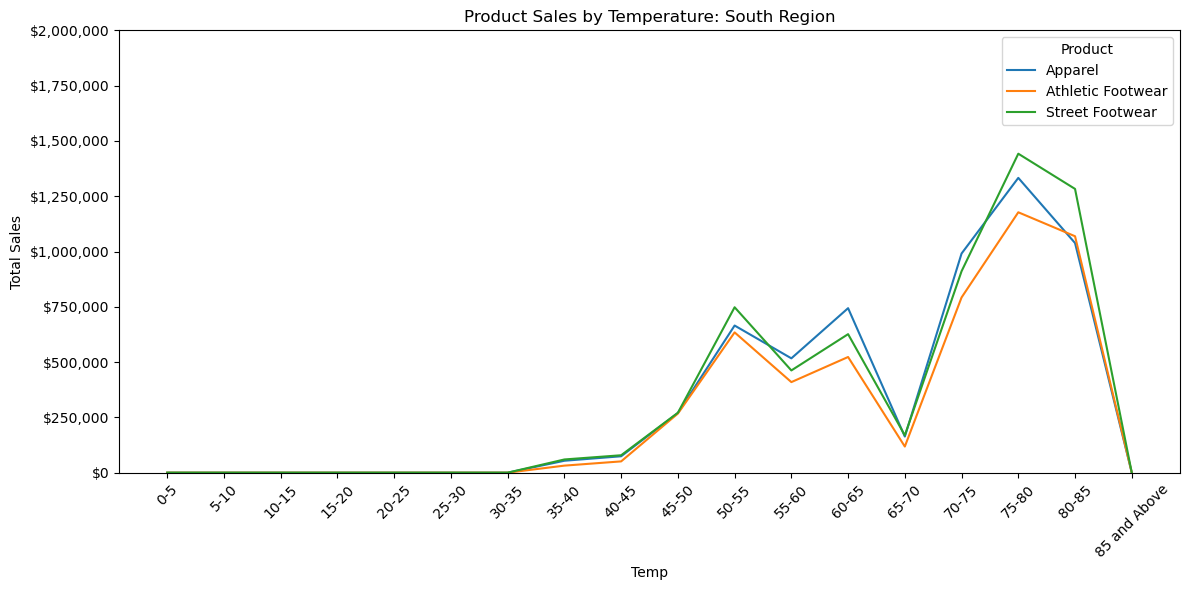

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


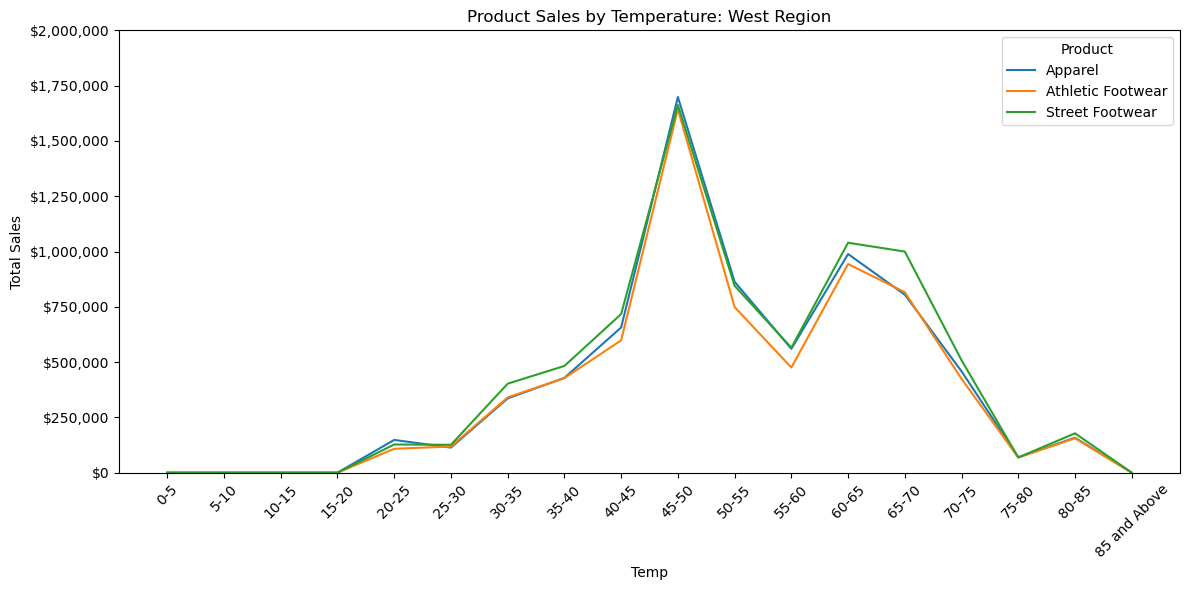

In [98]:
regions = ['Northeast', 'Southeast', 'Midwest', 'South', 'West']


for region in regions:
    region_data = revised_region_sales_temp_df[revised_region_sales_temp_df['Region'] == region]


    aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()
    pivoted_data = aggregated_data.pivot(index='Temp Bucket', columns='Product', values='Total Sales')

    pivoted_data.plot(kind='line', figsize=(12, 6))

    plt.title(f'Product Sales by Temperature: {region} Region')
    plt.xlabel('Temp')
    plt.ylabel('Total Sales')
    plt.legend(title='Product')

    plt.xticks(ticks=range(len(pivoted_data.index)), labels=pivoted_data.index, rotation=45)

    plt.ylim(0, 2_000_000)


    ax = plt.gca()  # Get the current axes
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  


    plt.tight_layout()
    plt.show()

